# Importing Libraries:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

### Setting display limit of rows and columns to max

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



### Importing data

In [3]:
data = pd.read_csv("C:/Users/meher/Downloads/Untitled discover search.csv")

In [4]:
data2 = pd.read_csv("C:/Users/meher/Downloads/Untitled discover search (2).csv")

In [5]:
data3 = pd.read_csv("C:/Users/meher/Downloads/Untitled discover search (3).csv")

In [6]:
data4 = pd.read_csv("C:/Users/meher/Downloads/Untitled discover search (4).csv")

### Creating one Dataframe with combine data from all the csv's

In [7]:
main_df = pd.concat([data, data2, data3, data4], axis=0, ignore_index=True)


In [8]:
main_df.head(3)

,@timestamp,@version,@version.keyword,_id,_index,_score,battery_current,battery_remaining_capacity,battery_soc,battery_soh,battery_temperature,battery_voltage,bin,bin.keyword,can_data.gear_state.timestamp,can_data.gear_state.value,can_data.odometer.timestamp,can_data.odometer.value,can_data.soc.timestamp,can_data.soc.value,can_data.vehicle_speed.timestamp,can_data.vehicle_speed.value,chassis_number,chassis_number.keyword,display_name,display_name.keyword,event.original,event.original.keyword,geo_point_loc,gps_data.alti,gps_data.commtime,gps_data.devbattery,gps_data.heading,gps_data.ignstatus,gps_data.ignstatus.keyword,gps_data.lat,gps_data.lng,gps_data.mobili,gps_data.rxdbm,gps_data.speed,gps_data.vehbattery,imei,imei.keyword,latitude,latitude.keyword,latitude_side,latitude_side.keyword,location,location.keyword,location_last_updated_at,longitude,longitude.keyword,longitude_side,longitude_side.keyword,meta.cid,meta.cid.keyword,meta.fleet_id,meta.fleet_id.keyword,meta.oem,meta.oem.keyword,meta.polled_at,meta.vehicle_id,meta.vehicle_id.keyword,odometer,registration_number,registration_number.keyword,server_recv_event_timestamp,soc,soc.keyword,speed,speed.keyword,utc,utc.keyword,vehicle_last_updated_at,vehicle_mode,vehicle_reg_number,vehicle_reg_number.keyword,vehicle_status,vehicle_status.keyword,vin,vin.keyword,vin_id,vin_id.keyword
0,"Nov 29, 2023 @ 23:59:25.471",1,1,vLtXHIwBF6tnC93YzbTK,de-raw-data-intellicar-vehicle-response-v1-202...,-,-,-,-,-,-,-,-,-,"1,701,276,907,356",0,"1,701,276,907,356","7,051.5","1,701,276,907,356",23,"1,701,276,907,356",0,-,-,-,-,"{""can_data"":{""ac"":null,""battery_temperature_hi...","{""can_data"":{""ac"":null,""battery_temperature_hi...",POINT (77.069967 28.440128),207,"1,701,281,034,401",4.07,0,off,off,28.44,77.07,0,29,0,12.77,-,-,-,-,-,-,-,-,-,-,-,-,-,HR55AP9255,HR55AP9255,f12336a1-0017-44b3-ba37-a04c2076fae3,f12336a1-0017-44b3-ba37-a04c2076fae3,INTELLICAR,INTELLICAR,"Nov 29, 2023 @ 23:59:25.469",f12336a1-0017-44b3-ba37-a04c2076fae3,f12336a1-0017-44b3-ba37-a04c2076fae3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,"Nov 29, 2023 @ 23:59:08.972",1,1,s7tXHIwBF6tnC93YjbRi,de-raw-data-euler-vehicle-response-v1-2023.11....,-,0,0,100,99.44,20.2,82.1,034100123SS1721296LC9202G05B,034100123SS1721296LC9202G05B,-,-,-,-,-,-,-,-,MD9EMHDL23A217004,MD9EMHDL23A217004,-,-,"{""battery_current"":0.0,""battery_remaining_capa...","{""battery_current"":0.0,""battery_remaining_capa...",POINT (77.2932116 28.5214233),-,-,-,-,-,-,-,-,-,-,-,-,866907059087485,866907059087485,-,-,-,-,"28.5214233, 77.2932116","28.5214233, 77.2932116","Nov 29, 2023 @ 23:50:50.000",-,-,-,-,MD9EMHDL23A217004,MD9EMHDL23A217004,00593dba-7b96-45ae-bb83-7b49ad992446,00593dba-7b96-45ae-bb83-7b49ad992446,EULER,EULER,"Nov 29, 2023 @ 23:59:08.967",fd0ffd22-9ff9-45ea-b9da-39a41b8dc893,fd0ffd22-9ff9-45ea-b9da-39a41b8dc893,"8,876.98",DL51GD6472,DL51GD6472,"Nov 29, 2023 @ 23:58:14.000",-,-,0,-,-,-,"Nov 29, 2023 @ 23:50:50.000",0,-,-,-,-,EM19A23AABAB00001,EM19A23AABAB00001,-,-
2,"Nov 29, 2023 @ 23:59:08.890",1,1,srtXHIwBF6tnC93YjbRi,de-raw-data-euler-vehicle-response-v1-2023.11....,-,-0.6,149.1,99.89,99.53,27,82.1,013280423SS1721296LC9202G05B,013280423SS1721296LC9202G05B,-,-,-,-,-,-,-,-,MD9EMHDL23D217406,MD9EMHDL23D217406,-,-,"{""battery_current"":-0.6,""battery_remaining_cap...","{""battery_current"":-0.6,""battery_remaining_cap...",POINT (80.2461066 13.0547166),-,-,-,-,-,-,-,-,-,-,-,-,863540061791381,863540061791381,-,-,-,-,"13.0547166, 80.2461066","13.0547166, 80.2461066","Nov 29, 2023 @ 23:58:00.000",-,-,-,-,MD9EMHDL23D217406,MD9EMHDL23D217406,56dac487-e708-4cd1-9f72-123f1f3d1162,56dac487-e708-4cd1-9f72-123f1f3d1162,EULER,EULER,"Nov 29, 2023 @ 23:59:08.862",0ac0aa36-a053-40e2-beb4-3a07ee268f55,0ac0aa36-a053-40e2-beb4-3a07ee268f55,"2,466.43",TN12AY6597,TN12AY6597,"Nov 29, 2023 @ 23:58:24.000",-,-,0,-,-,-,"Nov 29, 2023 @ 23:57:58.000",2,-,-,-,-,EM03E23AABAB00001,EM03E23AABAB00001,-,-


### Columns present in the data 

In [9]:
main_df.columns

Index(['@timestamp', '@version', '@version.keyword', '_id', '_index', '_score',
       'battery_current', 'battery_remaining_capacity', 'battery_soc',
       'battery_soh', 'battery_temperature', 'battery_voltage', 'bin',
       'bin.keyword', 'can_data.gear_state.timestamp',
       'can_data.gear_state.value', 'can_data.odometer.timestamp',
       'can_data.odometer.value', 'can_data.soc.timestamp',
       'can_data.soc.value', 'can_data.vehicle_speed.timestamp',
       'can_data.vehicle_speed.value', 'chassis_number',
       'chassis_number.keyword', 'display_name', 'display_name.keyword',
       'event.original', 'event.original.keyword', 'geo_point_loc',
       'gps_data.alti', 'gps_data.commtime', 'gps_data.devbattery',
       'gps_data.heading', 'gps_data.ignstatus', 'gps_data.ignstatus.keyword',
       'gps_data.lat', 'gps_data.lng', 'gps_data.mobili', 'gps_data.rxdbm',
       'gps_data.speed', 'gps_data.vehbattery', 'imei', 'imei.keyword',
       'latitude', 'latitude.keyword',

### Desired colums 

In [11]:
columns_required = [
    '_id',
    'battery_soc',
    'battery_soh',
    'chassis_number',
    'speed',
    'odometer',
    'vehicle_mode',
    'location',
    'location_last_updated_at',
    'battery_remaining_capacity',
    'battery_voltage',
    'battery_temperature',
    'registration_number'
]

df = main_df[columns_required]


In [12]:
df.head(10)

,_id,battery_soc,battery_soh,chassis_number,speed,odometer,vehicle_mode,location,location_last_updated_at,battery_remaining_capacity,battery_voltage,battery_temperature,registration_number
0,vLtXHIwBF6tnC93YzbTK,-,-,-,-,-,-,-,-,-,-,-,-
1,s7tXHIwBF6tnC93YjbRi,100,99.44,MD9EMHDL23A217004,0,"8,876.98",0,"28.5214233, 77.2932116","Nov 29, 2023 @ 23:50:50.000",0,82.1,20.2,DL51GD6472
2,srtXHIwBF6tnC93YjbRi,99.89,99.53,MD9EMHDL23D217406,0,"2,466.43",2,"13.0547166, 80.2461066","Nov 29, 2023 @ 23:58:00.000",149.1,82.1,27,TN12AY6597
3,sbtXHIwBF6tnC93YjbRi,88.81,99.74,MD9EMHDL23D217028,0,"2,592.04",0,"12.9391316, 80.137675","Nov 29, 2023 @ 23:52:32.000",0,80,27.6,TN12AY6557
4,rLtXHIwBF6tnC93YjbQW,55.66,100,MD9EMHDL23D217338,0,"2,468.84",0,"13.0548333, 80.24552","Nov 29, 2023 @ 23:31:41.000",70.8,75.1,25,TN12AY6585
5,rbtXHIwBF6tnC93YjbQW,98.93,100,MD9EMHDL23D217334,0,"2,096.09",0,"12.9400816, 80.1376283","Nov 29, 2023 @ 23:48:08.000",147.7,82,27,TN12AY6571
6,q7tXHIwBF6tnC93YjbQW,100,99.66,MD9EMHDL23D217048,0,"3,742.79",0,"13.0547683, 80.2460283","Nov 29, 2023 @ 23:57:55.000",0,81.9,28.8,TN12AY6581
7,sLtXHIwBF6tnC93YjbRi,100,99.79,MD9EMHDL23D217043,0,"2,049.09",3,"13.05474, 80.2460749","Nov 29, 2023 @ 23:58:00.000",0,82.3,29.8,TN12AY6514
8,qrtXHIwBF6tnC93YjbQW,98.88,97.07,MD9EMHDL23D217373,0,"3,658.24",0,"13.05462, 80.24609","Nov 29, 2023 @ 23:57:58.000",126.3,81.8,33,TN12AY6507
9,r7tXHIwBF6tnC93YjbRi,100,88.6,MD9EMHDL23D217359,0,"2,176.74",0,"13.0546466, 80.2461566","Nov 29, 2023 @ 23:57:58.000",136.7,82.4,26,TN12AY6561


## EDA

In [13]:
df = df.replace('-', np.nan)

# Drop rows containing NaN values
df = df.dropna()

In [14]:
df['location_last_updated_at'] = pd.to_datetime(df['location_last_updated_at'], format='%b %d, %Y @ %H:%M:%S.%f')


In [15]:
df['Date'] = df['location_last_updated_at'].dt.date
df['Time'] = df['location_last_updated_at'].dt.time


In [117]:
df.head(15)

,_id,battery_soc,battery_soh,chassis_number,speed,odometer,vehicle_mode,location_last_updated_at,battery_remaining_capacity,battery_voltage,battery_temperature,Date,Time
1,s7tXHIwBF6tnC93YjbRi,100.00,99.44,MD9EMHDL23A217004,0.0,8876.98,0.0,2023-11-29 23:50:50,0.0,82.1,20.2,2023-11-29,23:50:50
2,srtXHIwBF6tnC93YjbRi,99.89,99.53,MD9EMHDL23D217406,0.0,2466.43,2.0,2023-11-29 23:58:00,149.1,82.1,27.0,2023-11-29,23:58:00
3,sbtXHIwBF6tnC93YjbRi,88.81,99.74,MD9EMHDL23D217028,0.0,2592.04,0.0,2023-11-29 23:52:32,0.0,80.0,27.6,2023-11-29,23:52:32
4,rLtXHIwBF6tnC93YjbQW,55.66,100.00,MD9EMHDL23D217338,0.0,2468.84,0.0,2023-11-29 23:31:41,70.8,75.1,25.0,2023-11-29,23:31:41
5,rbtXHIwBF6tnC93YjbQW,98.93,100.00,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:48:08,147.7,82.0,27.0,2023-11-29,23:48:08
6,q7tXHIwBF6tnC93YjbQW,100.00,99.66,MD9EMHDL23D217048,0.0,3742.79,0.0,2023-11-29 23:57:55,0.0,81.9,28.8,2023-11-29,23:57:55
7,sLtXHIwBF6tnC93YjbRi,100.00,99.79,MD9EMHDL23D217043,0.0,2049.09,3.0,2023-11-29 23:58:00,0.0,82.3,29.8,2023-11-29,23:58:00
8,qrtXHIwBF6tnC93YjbQW,98.88,97.07,MD9EMHDL23D217373,0.0,3658.24,0.0,2023-11-29 23:57:58,126.3,81.8,33.0,2023-11-29,23:57:58
9,r7tXHIwBF6tnC93YjbRi,100.00,88.60,MD9EMHDL23D217359,0.0,2176.74,0.0,2023-11-29 23:57:58,136.7,82.4,26.0,2023-11-29,23:57:58
10,qbtXHIwBF6tnC93YjbQW,91.83,100.00,MD9EMHDL23D217416,0.0,2958.05,0.0,2023-11-29 23:57:56,129.5,80.8,28.0,2023-11-29,23:57:56


In [17]:
df = df.drop(columns='registration_number')

In [37]:
df = df.drop(columns='location')

In [18]:
float_columns = ['battery_soc', 'battery_soh']
df[float_columns] = df[float_columns].astype(float)
df['odometer'] = df['odometer'].str.replace(',', '').astype(float)


In [31]:
df['battery_remaining_capacity']=df['battery_remaining_capacity'].astype(float)

In [33]:
df['speed'] = df['speed'].astype(float)

In [35]:
df['vehicle_mode'] = df['vehicle_mode'].astype(float)

In [38]:
df.dtypes

_id                                   object
battery_soc                          float64
battery_soh                          float64
chassis_number                        object
speed                                float64
odometer                             float64
vehicle_mode                         float64
location_last_updated_at      datetime64[ns]
battery_remaining_capacity           float64
battery_voltage                      float64
battery_temperature                  float64
Date                                  object
Time                                  object
dtype: object

In [19]:
df['chassis_number'].value_counts()

MD9EMHDL23D217406    930
MD9EMHDL23D217028    930
MD9EMHDL23D217338    930
MD9EMHDL23D217334    930
MD9EMHDL23D217048    930
MD9EMHDL23D217043    930
MD9EMHDL23D217373    930
MD9EMHDL23D217359    930
MD9EMHDL23D217416    930
MD9EMHDL23D217319    930
MD9EMHDL23A217004    729
Name: chassis_number, dtype: int64

In [120]:
veh1 = df[df['chassis_number'] == 'MD9EMHDL23D217028']
veh2 = df[df['chassis_number'] == 'MD9EMHDL23D217406']
veh3 = df[df['chassis_number'] == 'MD9EMHDL23D217334']
veh4 = df[df['chassis_number'] == 'MD9EMHDL23D217359']
veh5 = df[df['chassis_number'] == 'MD9EMHDL23D217043']
veh6 = df[df['chassis_number'] == 'MD9EMHDL23D217048']
veh7 = df[df['chassis_number'] == 'MD9EMHDL23D217338']
veh8 = df[df['chassis_number'] == 'MD9EMHDL23D217416']
veh9 = df[df['chassis_number'] == 'MD9EMHDL23D217373']
veh10 = df[df['chassis_number'] == 'MD9EMHDL23D217319']
veh11 = df[df['chassis_number'] == 'MD9EMHDL23A217004']


## Analysis and Prediction for vehicle3

used vehicle 3 as it has more balanced range of Soc and odometer compared to other vehicles 

## Vehicle 3 

In [121]:
veh3.head(15)

,_id,battery_soc,battery_soh,chassis_number,speed,odometer,vehicle_mode,location_last_updated_at,battery_remaining_capacity,battery_voltage,battery_temperature,Date,Time
5,rbtXHIwBF6tnC93YjbQW,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:48:08,147.7,82.0,27.0,2023-11-29,23:48:08
84,Dm1SHIwBtrqVYmbR9T36,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:48:08,147.7,82.0,27.0,2023-11-29,23:48:08
166,sLtOHIwBF6tnC93YXrLj,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:48:00,147.7,82.0,27.0,2023-11-29,23:48:00
249,tm1JHIwBtrqVYmbRxwmC,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:42:56,147.7,82.0,27.0,2023-11-29,23:42:56
332,qLtFHIwBF6tnC93YMbAz,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:37:57,147.7,82.0,27.0,2023-11-29,23:37:57
412,ImxAHIwBtrqVYmbRmdZG,98.94,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 21:29:24,147.7,82.0,28.0,2023-11-29,21:29:24
499,IGw8HIwBtrqVYmbRAbys,98.94,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 21:29:24,147.7,82.0,28.0,2023-11-29,21:29:24
573,xbs3HIwBF6tnC93Ya62X,98.94,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 21:29:24,147.7,82.0,28.0,2023-11-29,21:29:24
654,eWwyHIwBtrqVYmbR1IhF,98.94,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 21:29:24,147.7,82.0,28.0,2023-11-29,21:29:24
742,87suHIwBF6tnC93YOav9,98.94,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 21:29:24,147.7,82.0,28.0,2023-11-29,21:29:24


In [122]:
veh3['Date'].value_counts()

2023-11-28    293
2023-11-27    286
2023-11-29    276
2023-11-30     74
2023-11-26      1
Name: Date, dtype: int64

## Calculating the distance travelled since the last update for the vehicle

In [126]:
veh3['distance_since_last_update'] = veh3.groupby('chassis_number')['odometer'].diff().fillna(0)


C:\Users\meher\AppData\Local\Temp\ipykernel_40704\4088349294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh3['distance_since_last_update'] = veh3.groupby('chassis_number')['odometer'].diff().fillna(0)


In [127]:
veh3['distance_since_last_update'] = veh3['distance_since_last_update'].abs()


C:\Users\meher\AppData\Local\Temp\ipykernel_40704\3355023434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh3['distance_since_last_update'] = veh3['distance_since_last_update'].abs()


In [128]:
veh3.head(5)

,_id,battery_soc,battery_soh,chassis_number,speed,odometer,vehicle_mode,location_last_updated_at,battery_remaining_capacity,battery_voltage,battery_temperature,Date,Time,distance_since_last_update
5,rbtXHIwBF6tnC93YjbQW,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:48:08,147.7,82.0,27.0,2023-11-29,23:48:08,0.0
84,Dm1SHIwBtrqVYmbR9T36,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:48:08,147.7,82.0,27.0,2023-11-29,23:48:08,0.0
166,sLtOHIwBF6tnC93YXrLj,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:48:00,147.7,82.0,27.0,2023-11-29,23:48:00,0.0
249,tm1JHIwBtrqVYmbRxwmC,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:42:56,147.7,82.0,27.0,2023-11-29,23:42:56,0.0
332,qLtFHIwBF6tnC93YMbAz,98.93,100.0,MD9EMHDL23D217334,0.0,2096.09,0.0,2023-11-29 23:37:57,147.7,82.0,27.0,2023-11-29,23:37:57,0.0


##   Exploring Co-relation between Columns

In [65]:
correlation_data = veh3.corr()

C:\Users\meher\AppData\Local\Temp\ipykernel_40704\3980281182.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = veh3.corr()


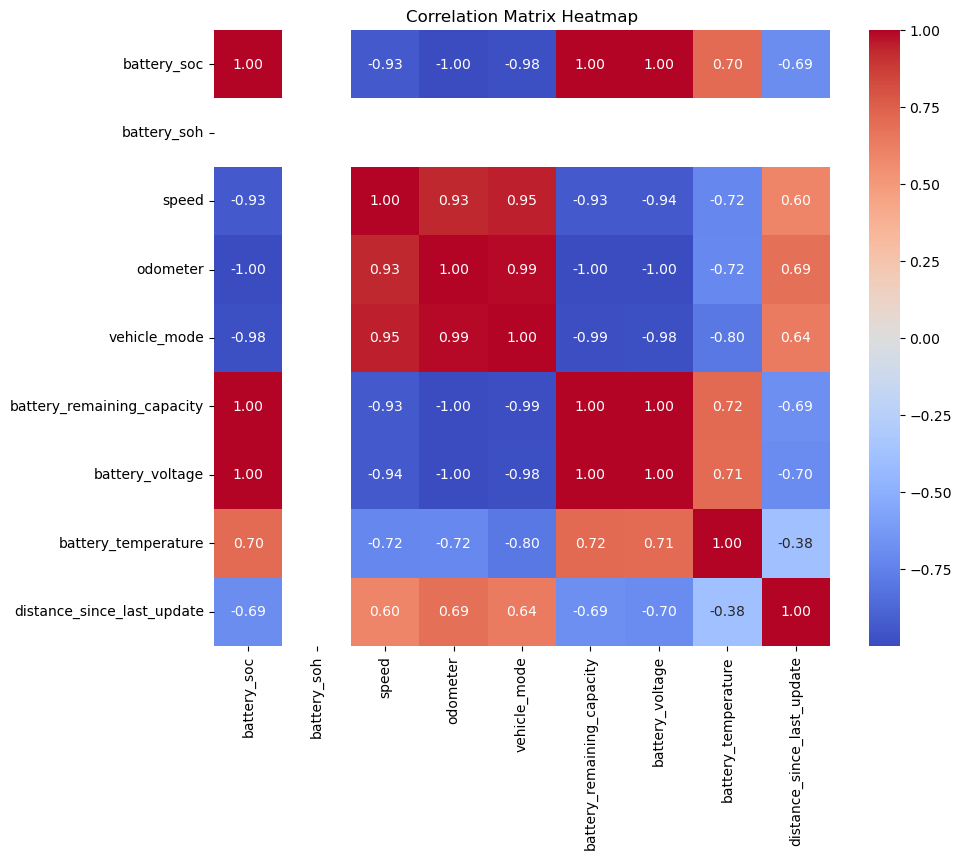

In [66]:
correlation_data.fillna(0, inplace=True)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Finding Range based on odometer readings

In [99]:
maxSoc = veh3[veh3['battery_soc'] == 99.43]


In [100]:
maxSoc

,_id,battery_soc,battery_soh,chassis_number,speed,odometer,vehicle_mode,location_last_updated_at,battery_remaining_capacity,battery_voltage,battery_temperature,Date,Time,distance_since_last_update,Remaining km
74874,AE_mDIwB_FSTivgZTrMD,99.43,100.0,MD9EMHDL23D217334,0.0,2096.08,0.0,2023-11-26 23:54:41,147.8,82.1,28.0,2023-11-26,23:54:41,0.0,61.6466


In [101]:
veh3['battery_soc'].min()

2.72

In [102]:
minSoc = veh3[veh3['battery_soc'] == 2.72]
minSoc

,_id,battery_soc,battery_soh,chassis_number,speed,odometer,vehicle_mode,location_last_updated_at,battery_remaining_capacity,battery_voltage,battery_temperature,Date,Time,distance_since_last_update,Remaining km
23184,mYl9IYwBtrqVYmbREYQH,2.72,100.0,MD9EMHDL23D217334,11.0,2158.67,3.0,2023-11-30 23:56:58,17.7,65.1,30.0,2023-11-30,23:56:58,62.59,1.6864


range = odometer_max reading - odometer_min reading 


2158.67-2096.08	= 62 

In [98]:
veh3['Remaining km'] = veh3['battery_soc'] * 62/100


C:\Users\meher\AppData\Local\Temp\ipykernel_40704\352170868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh3['Remaining km'] = veh3['battery_soc'] * 62/100


In [93]:
veh3.tail()

,_id,battery_soc,battery_soh,chassis_number,speed,odometer,vehicle_mode,location_last_updated_at,battery_remaining_capacity,battery_voltage,battery_temperature,Date,Time,distance_since_last_update,Remaining km
74553,llD4DIwB_FSTivgZrBpC,99.41,100.0,MD9EMHDL23D217334,0.0,2096.08,0.0,2023-11-27 00:20:50,147.8,82.1,28.0,2023-11-27,00:20:50,0.0,6163.42
74632,SlD0DIwB_FSTivgZFADk,99.41,100.0,MD9EMHDL23D217334,0.0,2096.08,0.0,2023-11-27 00:15:33,147.8,82.1,28.0,2023-11-27,00:15:33,0.0,6163.42
74719,l0_vDIwB_FSTivgZfeYQ,99.41,100.0,MD9EMHDL23D217334,0.0,2096.08,0.0,2023-11-27 00:10:56,147.8,82.1,28.0,2023-11-27,00:10:56,0.0,6163.42
74793,0k_qDIwB_FSTivgZ5czI,99.41,100.0,MD9EMHDL23D217334,0.0,2096.08,0.0,2023-11-27 00:05:00,147.8,82.1,28.0,2023-11-27,00:05:00,0.0,6163.42
74874,AE_mDIwB_FSTivgZTrMD,99.43,100.0,MD9EMHDL23D217334,0.0,2096.08,0.0,2023-11-26 23:54:41,147.8,82.1,28.0,2023-11-26,23:54:41,0.0,6164.66


In [49]:
veh3.columns

Index(['_id', 'battery_soc', 'battery_soh', 'chassis_number', 'speed',
       'odometer', 'vehicle_mode', 'location_last_updated_at',
       'battery_remaining_capacity', 'battery_voltage', 'battery_temperature',
       'Date', 'Time'],
      dtype='object')

In [135]:
sorted_veh3 = veh3.sort_values('odometer',ascending=False)
sorted_veh3


,_id,battery_soc,battery_soh,chassis_number,speed,odometer,vehicle_mode,location,battery_remaining_capacity,battery_voltage,battery_temperature,Date,Time,distance_since_last_update,Remaining km
23184,mYl9IYwBtrqVYmbREYQH,2.72,100.0,MD9EMHDL23D217334,11,2158.67,3,"12.9379949, 80.1383366",17.7,65.1,30,2023-11-30,23:56:58,62.59,680.0
23268,yb14IYwBF6tnC93YeW4U,6.09,100.0,MD9EMHDL23D217334,35,2155.67,3,"12.9596016, 80.1450133",22.1,65.2,30,2023-11-30,23:51:59,3.00,1522.5
23348,tb1zIYwBF6tnC93Y4m2b,12.14,100.0,MD9EMHDL23D217334,0,2154.08,2,"12.9608899, 80.1354616",25.7,67.7,29,2023-11-30,23:47:01,1.59,3035.0
23428,v71vIYwBF6tnC93YTGyV,11.26,100.0,MD9EMHDL23D217334,0,2153.80,0,"12.9610933, 80.1377333",26.1,68,30,2023-11-30,23:42:01,0.28,2815.0
23506,14lqIYwBtrqVYmbRtR6s,9.79,100.0,MD9EMHDL23D217334,0,2153.80,0,"12.9610933, 80.1377333",26.1,67.5,30,2023-11-30,23:37:01,0.00,2447.5
23585,yL1mIYwBF6tnC93YHWpm,16.46,100.0,MD9EMHDL23D217334,0,2152.61,2,"12.9635749, 80.1308416",28.7,68.5,29,2023-11-30,23:32:01,1.19,4115.0
23667,1b1hIYwBF6tnC93Yhmma,16.15,100.0,MD9EMHDL23D217334,0,2152.55,0,"12.9637366, 80.130455",28.9,68.6,29,2023-11-30,23:27:01,0.06,4037.5
23838,W4hYIYwBtrqVYmbRWLm6,14.61,100.0,MD9EMHDL23D217334,0,2152.53,2,"12.9638366, 80.1303516",29,68.4,29,2023-11-30,23:16:58,0.00,3652.5
23748,8r1cIYwBF6tnC93Y7mjt,15.52,100.0,MD9EMHDL23D217334,0,2152.53,0,"12.9637383, 80.1303816",29,68.6,29,2023-11-30,23:21:59,0.02,3880.0
23914,8r1TIYwBF6tnC93YwWaO,12.25,100.0,MD9EMHDL23D217334,0,2152.51,2,"12.9638083, 80.1305533",29.1,67.9,29,2023-11-30,23:11:58,0.02,3062.5


## # Average Soc for each day

In [130]:

avg_soc_per_date = veh3.groupby('Date')['battery_soc'].mean().reset_index()


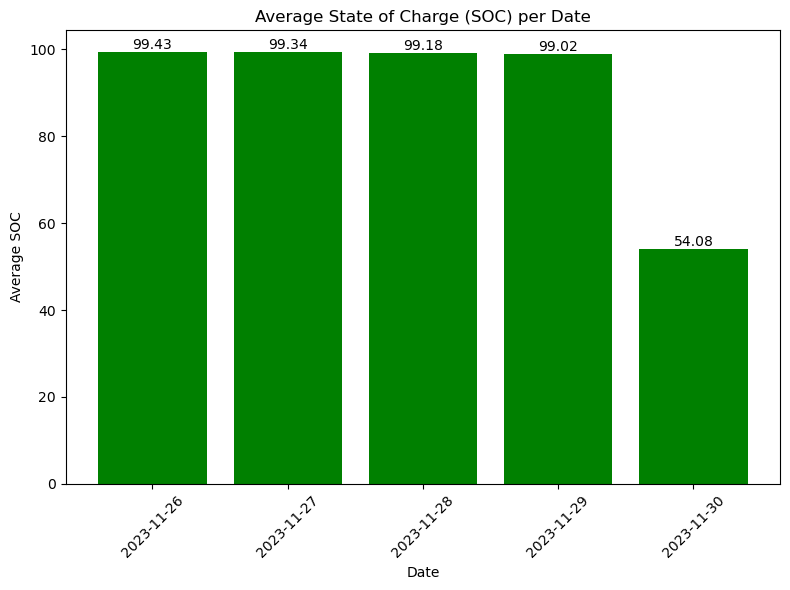

In [131]:
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_soc_per_date['Date'], avg_soc_per_date['battery_soc'], color='green')


for bar, value in zip(bars, avg_soc_per_date['battery_soc']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')

plt.xlabel('Date')
plt.ylabel('Average SOC')
plt.title('Average State of Charge (SOC) per Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Rate of energy consumption :

In [114]:
starting_battery_capacity = 99.43  # Battery SOC at the start
ending_battery_capacity = 2.72  # Battery SOC at the end
starting_odometer_reading = 2096  # Odometer reading at the start
ending_odometer_reading = 2158.67  # Odometer reading at the end


distance_traveled = abs(ending_odometer_reading - starting_odometer_reading)


energy_consumed = starting_battery_capacity - ending_battery_capacity


energy_consumption_rate = energy_consumed / distance_traveled

print(f"The rate of energy consumption is approximately {energy_consumption_rate:.2f} kWh per kilometer.")


The rate of energy consumption is approximately 1.54 kWh per kilometer.


## Model Training

In [116]:
X = veh3[['battery_soc']]
y = veh3['Remaining km']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
model = LinearRegression()

In [107]:
model.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)

In [109]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [110]:
r2

1.0

In [111]:
mse

6.363716535588843e-29

In [136]:
soc_value = 100.0  # Replace this with the SOC value for prediction
predicted_remaining_km = model.predict([[soc_value]])
print(f"Predicted Remaining km for Vehicle 3 with SOC {soc_value}: {predicted_remaining_km[0]}")

Predicted Remaining km for Vehicle 3 with SOC 100.0: 61.99999999999999


C:\Users\meher\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
